In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from scipy.spatial import transform


In [142]:
track_dict = joblib.load('data/demo_walk_10.pkl')

In [143]:
#remove first element in track_dict
list(track_dict.keys())
track_dict.pop(list(track_dict.keys())[0])

{'time': 0,
 'shot': 0,
 'frame_path': 'outputs//_DEMO/walk_10/img/000001.jpg',
 'tracked_ids': [],
 'tracked_bbox': [],
 'tid': [],
 'bbox': [],
 'tracked_time': [],
 'appe': [],
 'loca': [],
 'pose': [],
 'center': [],
 'scale': [],
 'size': [],
 'img_path': [],
 'img_name': [],
 'class_name': [],
 'conf': [],
 'annotations': [],
 'smpl': [],
 'camera': [],
 'camera_bbox': [],
 '3d_joints': [],
 '2d_joints': [],
 'mask': [],
 'extra_data': []}

In [144]:
frames = list(track_dict.keys())
print(frames[0])

outputs//_DEMO/walk_10/img/000002.jpg


In [145]:
params = list(track_dict.get(frames[0]).keys())

In [146]:
joints_2d = dict.get(frames[0]).get('smpl')

In [147]:
joints_2d

[{'global_orient': array([[[ 0.41479325, -0.03308455,  0.909314  ],
          [-0.09296171, -0.99565053,  0.00617966],
          [ 0.90515447, -0.08709468, -0.4160647 ]]], dtype=float32),
  'body_pose': array([[[ 0.9808197 , -0.15462719,  0.11867207],
          [ 0.15961652,  0.9866037 , -0.03370021],
          [-0.11187133,  0.05199585,  0.99236137]],
  
         [[ 0.99125946,  0.03203613, -0.12797816],
          [-0.04155767,  0.9965069 , -0.07243591],
          [ 0.12521055,  0.07712125,  0.9891283 ]],
  
         [[ 0.99968964, -0.00846301,  0.02343326],
          [ 0.00928568,  0.9993363 , -0.0352243 ],
          [-0.02311961,  0.03543096,  0.99910474]],
  
         [[ 0.9874241 ,  0.14939474, -0.05171977],
          [-0.14144881,  0.68873113, -0.7110847 ],
          [-0.0706113 ,  0.7094579 ,  0.70120144]],
  
         [[ 0.98816836, -0.14452828,  0.05133142],
          [ 0.15154299,  0.9716193 , -0.18163313],
          [-0.02362347,  0.18726301,  0.9820257 ]],
  
         [[ 0.

In [148]:

def get_2d_joints(dict):
    frames = list(dict.keys())
    joints_2d = []
    for frame in frames:
        joints_2d.append(dict.get(frame).get('2d_joints'))
    
    #reshape to (frames, 90)
    joints_2d = np.array(joints_2d)
    joints_2d = joints_2d.reshape(joints_2d.shape[0], -1)
    
    return np.array(joints_2d)

def get_smpl(dict):
    frames = list(dict.keys())
    joints_2d = []
    for frame in frames:
        joints_2d.append(dict.get(frame).get('smpl')[0])
    
    return np.array(joints_2d)

def get_cameras(dict):
    frames = list(dict.keys())
    joints_2d = []
    for frame in frames:
        joints_2d.append(dict.get(frame).get('camera'))
    
    return np.array(joints_2d)

In [149]:
# smpl_frames = np.array([get_smpl(dict)[i]['body_pose'][7] for i in range(len(get_smpl(dict)))])

# joints = [smpl_frames[i] for i in range(len(smpl_frames))]

# # smpl = get_smpl(dict)[0]['body_pose']
# # smpl[7]
# # print(joints)

# joints_x = []
# joints_y = []
# joints_z = []

# for i in range(len(joints)):
#     r = transform.Rotation.from_matrix(joints[i])
#     r = r.as_euler('xyz', degrees=False)
    
#     joints_x.append(r[0])
#     joints_y.append(r[1])
#     joints_z.append(r[2])
    
# plt.plot(joints)
# plt.show()

In [150]:
smpl_frames = np.array([get_smpl(track_dict)[i]['body_pose'] for i in range(len(get_smpl(track_dict)))])

smpl_joint_frames = []

for frame in smpl_frames:
    
    joints_x = []
    joints_y = []
    joints_z = []
    
    for joint in frame:
        r = transform.Rotation.from_matrix(joint)
        r = r.as_euler('xyz', degrees=False)

        joints_x.append(r[0])
        joints_y.append(r[1])
        joints_z.append(r[2])
    
    smpl_joint_frames.append([joints_x, joints_y, joints_z])

smpl_joint_frames = np.array(smpl_joint_frames)
#reshape to (frames, 23, 3)
# smpl_joint_frames = smpl_joint_frames.reshape(smpl_joint_frames.shape[0], 23, 3)
print(smpl_joint_frames.shape)

(68, 3, 23)


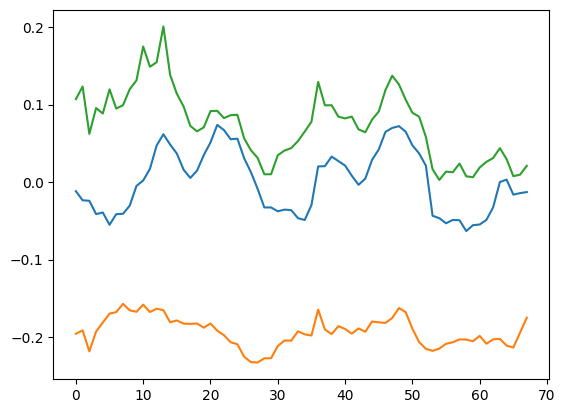

In [151]:
plt.plot(smpl_joint_frames[:, 0, 7])
plt.plot(smpl_joint_frames[:, 1, 7])
plt.plot(smpl_joint_frames[:, 2, 7])


In [152]:
#swap dimensions of smpl_joint_frames to (frames, 23, 3)
smpl_joint_frames = np.swapaxes(smpl_joint_frames, 1, 2)

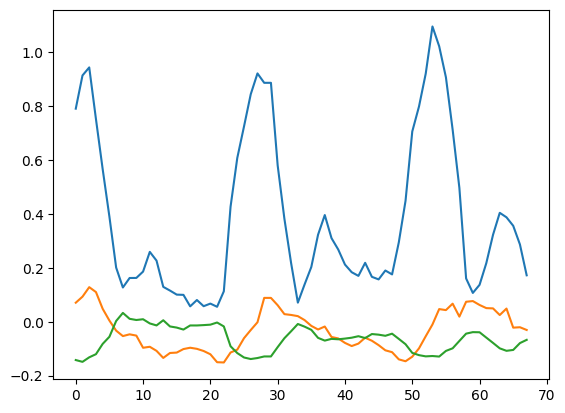

In [153]:
plt.plot(smpl_joint_frames[:, 3, 0])
plt.plot(smpl_joint_frames[:, 3, 1])
plt.plot(smpl_joint_frames[:, 3, 2])

In [154]:
#convert to joints to dataframe, by resizinng to (frames, 23*3)
smpl_joint_frames_df = smpl_joint_frames.reshape(smpl_joint_frames.shape[0], -1)
smpl_joint_frames_df = pd.DataFrame(smpl_joint_frames_df)

#get column names from SMPL model joint names

column_names = []

SMPL_JOINT_NAMES = [
#    "pelvis",
    "left_hip",
    "right_hip",
    "spine1",
    "left_knee",
    "right_knee",
    "spine2",
    "left_ankle",
    "right_ankle",
    "spine3",
    "left_foot",
    "right_foot",
    "neck",
    "left_collar",
    "right_collar",
    "head",
    "left_shoulder",
    "right_shoulder",
    "left_elbow",
    "right_elbow",
    "left_wrist",
    "right_wrist",
    "left_hand",
    "right_hand",
]


for i in SMPL_JOINT_NAMES:
    column_names.append(f'{i}_x')
    column_names.append(f'{i}_y')
    column_names.append(f'{i}_z')

smpl_joint_frames_df.columns = column_names

print(len(column_names))

69


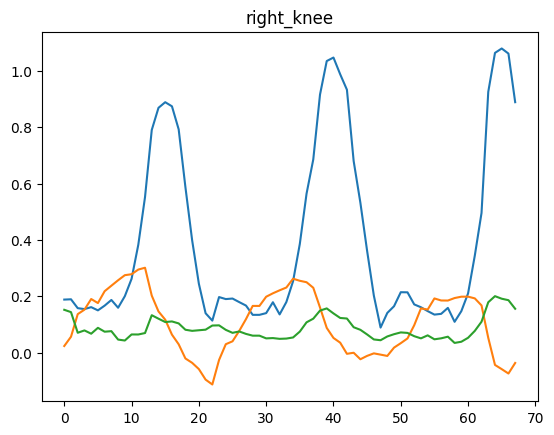

In [155]:

plot_col = 4

plt.plot(smpl_joint_frames_df[f'{SMPL_JOINT_NAMES[plot_col]}_x'])
plt.plot(smpl_joint_frames_df[f'{SMPL_JOINT_NAMES[plot_col]}_y'])
plt.plot(smpl_joint_frames_df[f'{SMPL_JOINT_NAMES[plot_col]}_z'])

plt.title(f'{SMPL_JOINT_NAMES[plot_col]}')

plt.show()

In [156]:
get_cameras(track_dict).shape
#reshape to (frames, 3)
camera_frames = get_cameras(track_dict).reshape(get_cameras(track_dict).shape[0], -1)

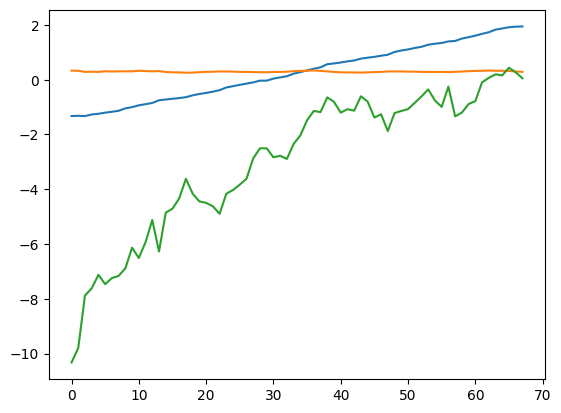

In [157]:
#plot camera frames
plt.plot(camera_frames[:, 0])
plt.plot(camera_frames[:, 1])
plt.plot(camera_frames[:, 2]-80)


In [158]:
track_dict.get(frames[0]).keys()

dict_keys(['time', 'shot', 'frame_path', 'tracked_ids', 'tracked_bbox', 'tid', 'bbox', 'tracked_time', 'appe', 'loca', 'pose', 'center', 'scale', 'size', 'img_path', 'img_name', 'class_name', 'conf', 'annotations', 'smpl', 'camera', 'camera_bbox', '3d_joints', '2d_joints', 'mask', 'extra_data'])